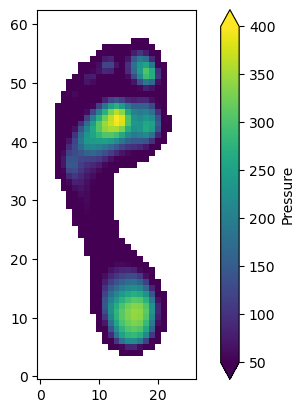

In [16]:
# https://github.com/0todd0000/mun104
# 背景改成白色，脚 红色-蓝色
import tables 
import matplotlib.pyplot as plt
import numpy as np

file_name = './data/MUN104L.h5' 
with tables.open_file(file_name, 'r') as h:
	I = h.root.I.read()
    
# NaN replace 0，show white
I_masked = np.ma.masked_where(I == 0, I)

# legend range
vmin, vmax = 50, 400

plt.imshow(I_masked, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pressure', extend='both', ticks=np.linspace(vmin, vmax, num=8))  # 添加颜色条，设置标签和刻度
plt.show()


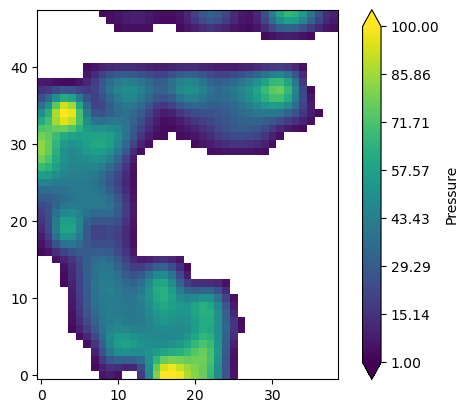

In [22]:
# zoom
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# data at one timepoint
data = [
    0,0,1,8,11,100,88,65,2,0,0,0,0,0,0,3,48,50,57,67,69,2,0,0,0,0,0,0,24,46,43,50,50,60,12,0,0,0,0,0,1,32,43,42,61,51,57,2,0,0,0,0,1,5,34,41,31,56,13,7,0,0,0,0,0,3,18,31,29,5,6,2,1,0,0,0,0,0,12,60,25,22,2,2,1,1,0,0,0,0,0,23,40,41,35,2,1,1,1,1,0,0,0,0,46,42,41,24,2,1,1,1,1,0,0,0,0,79,50,52,41,4,1,1,2,2,2,0,0,0,77,66,57,53,21,4,6,16,26,21,4,1,0,44,103,32,33,34,12,26,28,34,45,43,11,0,10,11,16,42,44,32,51,35,40,60,69,5,1,1,2,2,4,3,2,2,2,1,2,2,1,0,0,0,0,0,1,0,1,2,1,2,6,3,1,2,3,3,6,10,5,12,33,11,18,66,42,10
]

# reshape to 16*13 
matrix = np.array(data).reshape((16, 13))

zoom_factor = 3  
matrix = zoom(matrix, zoom_factor)

# NaN replace 0，show white
matrix[matrix < 4] = 0
matrix = np.ma.masked_where(matrix == 0, matrix)


vmin, vmax = 1, 100  # 这里根据实际数据调整颜色范围

plt.imshow(matrix, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Pressure', extend='both', ticks=np.linspace(vmin, vmax, num=8))  # 添加颜色条，设置标签和刻度
plt.show()

In [23]:
# 四周补值 

In [54]:
import pandas as pd
import numpy as np

# 读取 CSV 文件，跳过第一行
df = pd.read_csv('./data/test.csv', header=None, skiprows=1)

# 提取第1列的数据
column_data = df[0]

# 处理数据
data_list = []
for cell in column_data:
    # 以逗号分隔
    parts = cell.split(',')
    # 确保提取的部分是有效的数字
    try:
        # 提取第6个到最后一个数字，并过滤掉非数字
        numbers = [int(x) for x in parts[5:] if x.isdigit()]
        data_list.append(numbers)
    except ValueError:
        # 如果遇到非数字的情况，可以选择跳过或处理
        print(f"Skipping invalid data: {cell}")

# 将数据转换为 np.array
data_array = np.array(data_list, dtype=int)

# 打印结果
print(data_array)
print(data_array.shape)


[[ 0  0  1 ... 66 42 10]
 [ 0  0  1 ... 68 45 11]
 [ 0  0  1 ... 69 47 14]
 ...
 [ 0  0  0 ... 38 46 34]
 [ 0  0  0 ... 37 46 33]
 [ 0  0  0 ... 38 48 29]]
(485, 208)


485


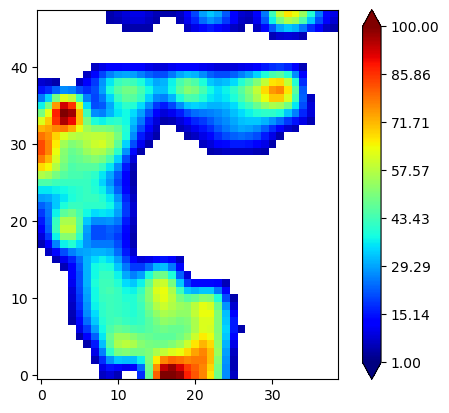

In [53]:
# animation
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import matplotlib.animation as animation

# 数据集
datasets = data_array

# 转换数据集
zoom_factor = 3
vmin, vmax = 1, 100

def process_data(data):
    matrix = np.array(data).reshape((16, 13))
    matrix = zoom(matrix, zoom_factor)
    matrix[matrix < 5] = 0
    masked_matrix = np.ma.masked_where(matrix == 0, matrix)
    return masked_matrix

processed_datasets = [process_data(data) for data in datasets]
print(len(processed_datasets))

# 创建图形对象
fig, ax = plt.subplots()
cmap = plt.cm.jet
cmap.set_bad(color='white')
cbar = fig.colorbar(ax.imshow(processed_datasets[0], origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax, cmap=cmap), ax=ax, extend='both', ticks=np.linspace(vmin, vmax, num=8))

# 初始化函数
def init():
    ax.clear()
    ax.imshow(processed_datasets[0], origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax, cmap=cmap)

# 动画函数
def animate(i):
    ax.clear()
    ax.imshow(processed_datasets[i], origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax, cmap=cmap)
    return ax

# 创建动画
ani = animation.FuncAnimation(fig, animate, frames=len(processed_datasets), init_func=init, interval=50, blit=False)

plt.show()



Number of processed datasets: 485
Shape of first dataset: (48, 39)


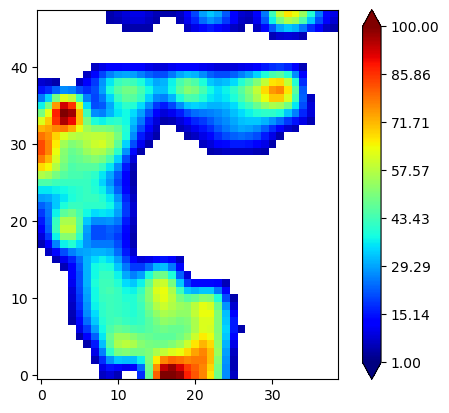

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import matplotlib.animation as animation

# 假设这里是从CSV中读取的示例数据
data_list = data_array

# 转换数据集
zoom_factor = 3
vmin, vmax = 1, 100

def process_data(data):
    try:
        matrix = np.array(data).reshape((16, 13))
        matrix = zoom(matrix, zoom_factor)
        matrix[matrix < 5] = 0
        masked_matrix = np.ma.masked_where(matrix == 0, matrix)
        return masked_matrix
    except Exception as e:
        print(f"Error processing data: {e}")
        return np.ma.masked_array(np.zeros((16 * zoom_factor, 13 * zoom_factor)), mask=True)

# 处理数据
try:
    processed_datasets = [process_data(data) for data in data_list]
    print(f"Number of processed datasets: {len(processed_datasets)}")
    if len(processed_datasets) > 0:
        print(f"Shape of first dataset: {processed_datasets[0].shape}")
    else:
        print("No datasets processed.")
except Exception as e:
    print(f"Error processing datasets: {e}")

# 创建图形对象
fig, ax = plt.subplots()
cmap = plt.cm.jet
cmap.set_bad(color='white')

if len(processed_datasets) > 0:
    # 初始化图像
    im = ax.imshow(processed_datasets[0], origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax, cmap=cmap)
    cbar = fig.colorbar(im, ax=ax, extend='both', ticks=np.linspace(vmin, vmax, num=8))

    # 初始化函数
    def init():
        im.set_data(processed_datasets[0])
        return [im]

    # 动画函数
    def animate(i):
        im.set_data(processed_datasets[i])
        return [im]

    # 创建动画
    ani = animation.FuncAnimation(fig, animate, frames=len(processed_datasets), init_func=init, interval=50, blit=True)

    # 显示动画
    plt.show()
else:
    print("No data available to animate.")


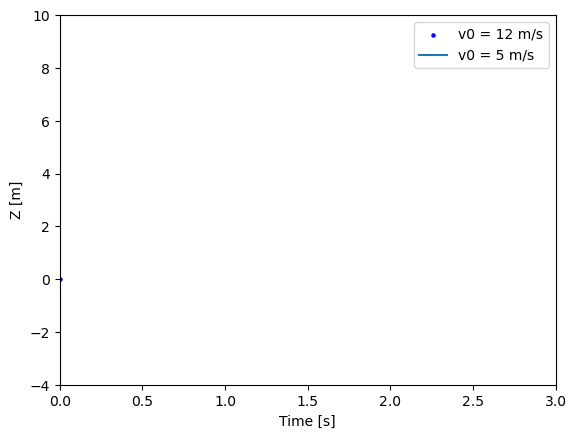

In [65]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()